In [62]:
# Question 1 (a)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

#n_neighbors value
n=3

# Load Iris dataset
iris = load_iris()
x, y = iris.data, iris.target

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=n)
rnn_classifier = RadiusNeighborsClassifier(radius=3.0)

# Fit classifiers
knn_classifier.fit(x_train, y_train)
rnn_classifier.fit(x_train, y_train)

# Predictions
knn_pred = knn_classifier.predict(x_test)
rnn_pred = rnn_classifier.predict(x_test)

# Confusion matrix and classification report
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
rnn_conf_matrix = confusion_matrix(y_test, rnn_pred)

# Evaluate using various metrics
knn_accuracy = accuracy_score(y_test, knn_pred)
rnn_accuracy = accuracy_score(y_test, rnn_pred)

knn_precision = precision_score(y_test, knn_pred, average='macro')
rnn_precision = precision_score(y_test, rnn_pred, average='macro')

knn_recall = recall_score(y_test, knn_pred, average='macro')
rnn_recall = recall_score(y_test, rnn_pred, average='macro')

knn_f1 = f1_score(y_test, knn_pred, average='macro')
rnn_f1 = f1_score(y_test, rnn_pred, average='macro')

# Print results
print("KNN Classifier Metrics:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)
print("Confusion Matrix:")
print(knn_conf_matrix)

print("\nrNN Classifier Metrics:")
print("Accuracy:", rnn_accuracy)
print("Precision:", rnn_precision)
print("Recall:", rnn_recall)
print("F1 Score:", rnn_f1)
print("Confusion Matrix:")
print(rnn_conf_matrix)


KNN Classifier Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

rNN Classifier Metrics:
Accuracy: 0.8333333333333334
Precision: 0.8809523809523809
Recall: 0.8484848484848485
F1 Score: 0.8294970161977835
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  5  6]]


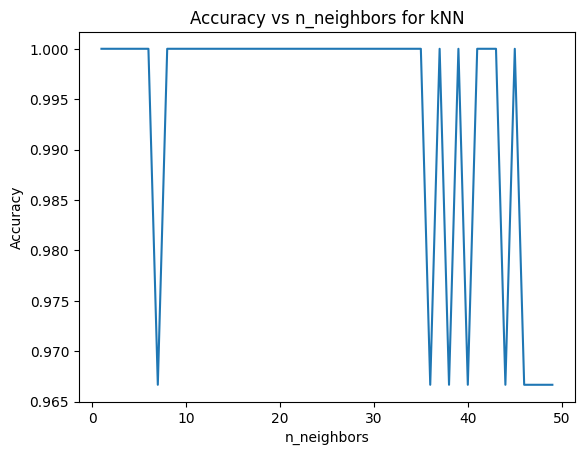

In [47]:
# Question 1 (b)

import matplotlib.pyplot as plt

# Define range of n_neighbors
n_neighbors_range = range(1, 50)
accuracy_scores = []

for n_neighbors in n_neighbors_range:
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_classifier.fit(x_train, y_train)
    knn_pred = knn_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, knn_pred)
    accuracy_scores.append(accuracy)

# Plotting
plt.plot(n_neighbors_range, accuracy_scores)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n_neighbors for kNN')
plt.show()


In [59]:
# Question 1 (c)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC

# Load Iris dataset
iris = load_iris()
x, y = iris.data, iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

svm_classifier = SVC()
%timeit svm_classifier.fit(x_train, y_train)
%timeit svm_pred = svm_classifier.predict(x_test)
svm_conf_matrix = confusion_matrix(y_test, svm_pred)

print("\nSVM Classifier Metrics:")
print("Confusion Matrix:")
print(svm_conf_matrix)

# Comment on results: Same as kNN with neighbour of 3


996 µs ± 4.47 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
230 µs ± 1.59 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

SVM Classifier Metrics:
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
# Question 1 (d)

# Using %timeit magic function
import timeit

knn_fit_time = timeit.timeit(lambda: knn_classifier.fit(x_train, y_train), number=10)
knn_pred_time = timeit.timeit(lambda: knn_classifier.predict(x_test), number=10)

rnn_fit_time = timeit.timeit(lambda: rnn_classifier.fit(x_train, y_train), number=10)
rnn_pred_time = timeit.timeit(lambda: rnn_classifier.predict(x_test), number=10)

svm_fit_time = timeit.timeit(lambda: svm_classifier.fit(x_train, y_train), number=10)
svm_pred_time = timeit.timeit(lambda: svm_classifier.predict(x_test), number=10)

print("kNN Classifier:")
print("Average Training Time:", knn_fit_time / 10)
print("Average Prediction Time:", knn_pred_time / 10)

print("\nrNN Classifier:")
print("Average Training Time:", rnn_fit_time / 10)
print("Average Prediction Time:", rnn_pred_time / 10)

print("\nSVM Classifier:")
print("Average Training Time:", svm_fit_time / 10)
print("Average Prediction Time:", svm_pred_time / 10)


kNN Classifier:
Average Training Time: 0.0007407384924590588
Average Prediction Time: 0.003592117968946695

rNN Classifier:
Average Training Time: 0.0005893413908779621
Average Prediction Time: 0.0007512247189879418

SVM Classifier:
Average Training Time: 0.0010515359230339528
Average Prediction Time: 0.0002504215575754642
